## Not A Unit Test :D 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [20]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100, abort=True)

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))
#policy_grad = lambda x, a: np.array([1.,x[0],x[1]]) / a

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)
policy_grad = lambda x, a, par: np.array([1.,-x[0],-x[1]])*policy_par(par)(x)

policy = tools.Policy(policy_par,(3), gradient=policy_grad, sigma=0.1)
optimizer = srb.PolicyGradient(executer, lincar, estimator='gpomdp', max_it=100, eps=0.00000001,  
                       parameter_domain=np.array([0,1]), rate = -0.2)

In [21]:
policy.setParameter(np.array([1,1,1]))
trace, i, _ = executer.rollout(policy)
t = trace[10]
print(policy.log_grad(t[1],t[0]))

[-1.025    0.57271  0.07659]


In [22]:
par, conv = optimizer.optimize(policy)

Start GPOMDP optimization:
Initial Parameters: [ 0.03432  0.17879  0.30674]
Run: 0  	Parameter: 	[ 0.03432  0.17879  0.30674]	Reward: -322.276858765
		Gradient: 	[-0.07556 -0.00253 -0.00126]
Run: 10  	Parameter: 	[ 0.15339  0.18092  0.30764]	Reward: -252.382157617
		Gradient: 	[-0.06181 -0.00109 -0.00039]
		Average Time: 	0.72s/step
Run: 20  	Parameter: 	[ 0.24185  0.18178  0.30805]	Reward: -196.648454391
		Gradient: 	[ -2.24706e-02  -2.45225e-04  -2.69311e-05]
		Average Time: 	0.73s/step
Run: 30  	Parameter: 	[ 0.28792  0.18206  0.30824]	Reward: -173.868773523
		Gradient: 	[ -5.31715e-02   6.28873e-06  -5.47242e-05]
		Average Time: 	0.46s/step
Run: 40  	Parameter: 	[ 0.32625  0.1822   0.30832]	Reward: -151.731129205
		Gradient: 	[ -1.50962e-02  -6.80934e-05  -7.20476e-05]
		Average Time: 	0.40s/step
Run: 50  	Parameter: 	[ 0.33886  0.18224  0.30836]	Reward: -140.435925257
		Gradient: 	[ -8.00259e-03  -1.20329e-05  -9.78964e-06]
		Average Time: 	0.35s/step
Run: 60  	Parameter: 	[ 0.357

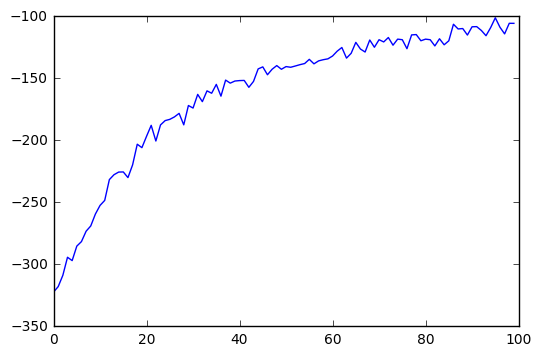

In [23]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[ 0.3881   0.18233  0.3084 ]
Best Reward: 	-101.086512953


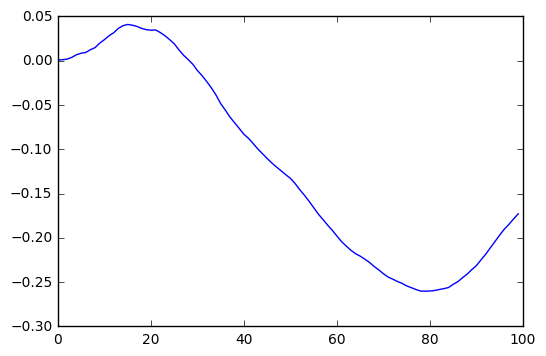

In [24]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()